<a href="https://colab.research.google.com/github/sarkar2527/DSAP/blob/main/Hackathon_Wipro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Reading the DataSet**

In [47]:
import pandas as pd
df_raw_train=pd.read_csv("/content/drive/MyDrive/Hackathon/Hackathon_Wipro/train (1).csv")

In [86]:
df_raw_test=pd.read_csv("/content/drive/MyDrive/Hackathon/Hackathon_Wipro/test (1).csv")

In [ ]:
df_raw_train.shape

(175296, 18)

In [ ]:
df_raw_test.shape

(17520, 18)

In [ ]:
df_raw_train.head()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0


In [ ]:
df_raw_test.head()

,Year,Month,Day,Hour,Minute,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,2019,1,1,0,0,7,18.4,18.8,1008,97.70,106.23,3.5,190,2.3,0,NaN,NaN,NaN
1,2019,1,1,0,30,3,18.4,18.6,1008,98.92,112.36,3.5,187,2.5,0,NaN,NaN,NaN
2,2019,1,1,1,0,3,18.2,18.5,1008,98.35,118.58,3.5,184,2.8,0,NaN,NaN,NaN
3,2019,1,1,1,30,3,18.2,18.3,1008,99.58,124.86,3.5,185,3.0,0,NaN,NaN,NaN
4,2019,1,1,2,0,0,18.0,18.0,1008,99.71,131.20,3.6,186,3.1,0,NaN,NaN,NaN


In [49]:
df_raw_train.isna().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
Temperature           0
Pressure              0
Relative Humidity     0
Solar Zenith Angle    0
Precipitable Water    0
Wind Direction        0
Wind Speed            0
Fill Flag             0
dtype: int64

In [50]:
df_raw_test.isna().sum()

Year                      0
Month                     0
Day                       0
Hour                      0
Minute                    0
Cloud Type                0
Dew Point                 0
Temperature               0
Pressure                  0
Relative Humidity         0
Solar Zenith Angle        0
Precipitable Water        0
Wind Direction            0
Wind Speed                0
Fill Flag                 0
Clearsky DHI          17520
Clearsky DNI          17520
Clearsky GHI          17520
dtype: int64

In [51]:
df_raw_test.drop(df_raw_test.columns[[15, 16, 17]], axis = 1, inplace = True)

In [52]:
df_raw_test.isna().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Cloud Type            0
Dew Point             0
Temperature           0
Pressure              0
Relative Humidity     0
Solar Zenith Angle    0
Precipitable Water    0
Wind Direction        0
Wind Speed            0
Fill Flag             0
dtype: int64

In [53]:
cols = ['Year','Month','Day','Hour','Minute','Cloud Type','Dew Point','Temperature','Pressure','Relative Humidity','Solar Zenith Angle','Precipitable Water','Wind Direction','Wind Speed','Fill Flag'] # one or more

Q1 = df_raw_train[cols].quantile(0.25)
Q3 = df_raw_train[cols].quantile(0.75)
IQR = Q3 - Q1

df_new_train = df_raw_train[~((df_raw_train[cols] < (Q1 - 1.5 * IQR)) |(df_raw_train[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [55]:
df_raw_train.shape

(175296, 18)

In [56]:
df_new_train.shape

(160587, 18)

In [57]:
cols = ['Year','Month','Day','Hour','Minute','Cloud Type','Dew Point','Temperature','Pressure','Relative Humidity','Solar Zenith Angle','Precipitable Water','Wind Direction','Wind Speed','Fill Flag'] # one or more

Q1 = df_raw_test[cols].quantile(0.25)
Q3 = df_raw_test[cols].quantile(0.75)
IQR = Q3 - Q1

df_new_test = df_raw_test[~((df_raw_test[cols] < (Q1 - 1.5 * IQR)) |(df_raw_test[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [58]:
df_raw_test.shape

(17520, 15)

In [59]:
df_new_test.shape

(15379, 15)

In [18]:
df_new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160587 entries, 0 to 175295
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                160587 non-null  int64  
 1   Month               160587 non-null  int64  
 2   Day                 160587 non-null  int64  
 3   Hour                160587 non-null  int64  
 4   Minute              160587 non-null  int64  
 5   Clearsky DHI        160587 non-null  int64  
 6   Clearsky DNI        160587 non-null  int64  
 7   Clearsky GHI        160587 non-null  int64  
 8   Cloud Type          160587 non-null  int64  
 9   Dew Point           160587 non-null  float64
 10  Temperature         160587 non-null  float64
 11  Pressure            160587 non-null  int64  
 12  Relative Humidity   160587 non-null  float64
 13  Solar Zenith Angle  160587 non-null  float64
 14  Precipitable Water  160587 non-null  float64
 15  Wind Direction      160587 non-nul

In [19]:
df_new_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15379 entries, 0 to 17519
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                15379 non-null  int64  
 1   Month               15379 non-null  int64  
 2   Day                 15379 non-null  int64  
 3   Hour                15379 non-null  int64  
 4   Minute              15379 non-null  int64  
 5   Cloud Type          15379 non-null  int64  
 6   Dew Point           15379 non-null  float64
 7   Temperature         15379 non-null  float64
 8   Pressure            15379 non-null  int64  
 9   Relative Humidity   15379 non-null  float64
 10  Solar Zenith Angle  15379 non-null  float64
 11  Precipitable Water  15379 non-null  float64
 12  Wind Direction      15379 non-null  int64  
 13  Wind Speed          15379 non-null  float64
 14  Fill Flag           15379 non-null  int64  
dtypes: float64(6), int64(9)
memory usage: 1.9 MB


**Splitting X and Y**

In [60]:
x_train_data = df_new_train[df_new_train.columns[[0,1,2,3,4,8,9,10,11,12,13,14,16,17]]]

In [61]:
y = df_new_train[['Clearsky DHI','Clearsky DNI','Clearsky GHI']]

In [87]:
df_raw_test.shape

(17520, 18)

In [88]:
df_raw_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                17520 non-null  int64  
 1   Month               17520 non-null  int64  
 2   Day                 17520 non-null  int64  
 3   Hour                17520 non-null  int64  
 4   Minute              17520 non-null  int64  
 5   Cloud Type          17520 non-null  int64  
 6   Dew Point           17520 non-null  float64
 7   Temperature         17520 non-null  float64
 8   Pressure            17520 non-null  int64  
 9   Relative Humidity   17520 non-null  float64
 10  Solar Zenith Angle  17520 non-null  float64
 11  Precipitable Water  17520 non-null  float64
 12  Wind Direction      17520 non-null  int64  
 13  Wind Speed          17520 non-null  float64
 14  Fill Flag           17520 non-null  int64  
 15  Clearsky DHI        0 non-null      float64
 16  Clea

In [89]:
x_test_data = df_raw_test.iloc[:,0:14]

In [90]:
x_test_data.shape

(17520, 14)

**Multicolinearity**

In [ ]:
VIF = []

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
for j in range(x_train.shape[1]):
    VIF.append(variance_inflation_factor(x_train.values,j))
print(VIF)

[8.686313972488671, 18.038299967719915, 57.62032667483062, 18.748623473337737, 11.83207682131678, 4.612058043640489, nan]


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1638: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [ ]:
import numpy as np
np.transpose(VIF)
pd.DataFrame(x_train.columns)
pd.DataFrame(np.transpose(VIF))
pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(VIF))], axis =1)

,0,0
0,Hour,8.686314
1,Temperature,18.038300
2,Pressure,57.620327
3,Solar Zenith Angle,18.748623
4,Precipitable Water,11.832077
5,Wind Direction,4.612058
6,Fill Flag,NaN


**Standardization**

In [63]:
from sklearn.preprocessing import StandardScaler
x_scale_train = StandardScaler().fit_transform(x_train_data)

In [91]:
from sklearn.preprocessing import StandardScaler
x_scale_test = StandardScaler().fit_transform(x_test_data)

**Splitting Train and Test**

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scale_train,y,test_size=0.25, random_state=20)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_train_data,y,test_size=0.25, random_state=20)

In [ ]:
from sklearn.linear_model import Ridge
RR = Ridge(alpha=0.99)  # alpha=1.0
RR.fit(x_train,y_train)
RR.coef_

array([[-7.15079933e-01, -9.56934996e-01, -3.26498891e-02,
         1.29765715e+00,  1.54034545e-02,  9.50435572e-01,
         2.49995324e-01,  6.88429850e-02,  2.23006234e-01,
        -3.76967173e-01, -1.04156669e+00,  3.66631599e+00,
         4.07703920e+00,  0.00000000e+00],
       [ 1.62480177e+00,  9.78030287e-01,  1.03726189e-01,
         8.96443915e+00,  1.12404281e-01,  2.89533954e+00,
         7.52545132e+00, -4.97327863e+00,  2.49325562e+00,
        -4.68733883e+00, -5.77141925e+00, -2.54924415e+01,
         3.84364741e+01,  0.00000000e+00],
       [ 1.37743397e+00, -2.65271110e+00, -4.85978864e-03,
        -1.74965246e-01,  8.25277008e-02,  3.49134901e+00,
        -9.54802615e+00,  1.13502137e+01,  1.40930276e+00,
        -8.00055117e-01, -5.95886489e+00, -2.45037868e+00,
         2.82998968e+01,  0.00000000e+00]])

In [ ]:
import numpy as np

In [ ]:
co_eff = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(RR.coef_))], axis =1)
print(co_eff)

                     0         0          1          2
0                 Year -0.715080   1.624802   1.377434
1                Month -0.956935   0.978030  -2.652711
2                  Day -0.032650   0.103726  -0.004860
3                 Hour  1.297657   8.964439  -0.174965
4               Minute  0.015403   0.112404   0.082528
5           Cloud Type  0.950436   2.895340   3.491349
6            Dew Point  0.249995   7.525451  -9.548026
7          Temperature  0.068843  -4.973279  11.350214
8             Pressure  0.223006   2.493256   1.409303
9    Relative Humidity -0.376967  -4.687339  -0.800055
10  Solar Zenith Angle -1.041567  -5.771419  -5.958865
11  Precipitable Water  3.666316 -25.492442  -2.450379
12          Wind Speed  4.077039  38.436474  28.299897
13           Fill Flag  0.000000   0.000000   0.000000


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
y_pred_train_rr = RR.predict(x_train)
y_pred_test_rr = RR.predict(x_test)
MSE_train_rr = mean_squared_error(y_train,y_pred_train_rr).round(3)
MSE_test_rr = mean_squared_error(y_test,y_pred_test_rr).round(3)
print(MSE_train_rr)
print(MSE_test_rr)

12882.975
12855.64


In [ ]:
list(np.arange(0.99,2,0.01))

[0.99,
 1.0,
 1.01,
 1.02,
 1.03,
 1.04,
 1.05,
 1.06,
 1.07,
 1.08,
 1.09,
 1.1,
 1.11,
 1.12,
 1.1300000000000001,
 1.1400000000000001,
 1.1500000000000001,
 1.1600000000000001,
 1.1700000000000002,
 1.1800000000000002,
 1.1900000000000002,
 1.2000000000000002,
 1.2100000000000002,
 1.2200000000000002,
 1.2300000000000002,
 1.2400000000000002,
 1.2500000000000002,
 1.2600000000000002,
 1.2700000000000002,
 1.2800000000000002,
 1.2900000000000003,
 1.3000000000000003,
 1.3100000000000003,
 1.3200000000000003,
 1.3300000000000003,
 1.3400000000000003,
 1.3500000000000003,
 1.3600000000000003,
 1.3700000000000003,
 1.3800000000000003,
 1.3900000000000003,
 1.4000000000000004,
 1.4100000000000004,
 1.4200000000000004,
 1.4300000000000004,
 1.4400000000000004,
 1.4500000000000004,
 1.4600000000000004,
 1.4700000000000004,
 1.4800000000000004,
 1.4900000000000004,
 1.5000000000000004,
 1.5100000000000005,
 1.5200000000000005,
 1.5300000000000005,
 1.5400000000000005,
 1.5500000000000005,
 

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np
list(np.arange(0.99,3,0.01))
alpha_values = {'alpha': list(np.arange(0.99,2,0.01))}
RR_cv = GridSearchCV(Ridge(),alpha_values,scoring="neg_mean_squared_error",cv =100)


In [ ]:
RR_cv.fit(x_train,y_train)
print(RR_cv.best_score_)
print(RR_cv.best_params_)

-12886.386198500311
{'alpha': 1.9900000000000009}


ValueError: ignored

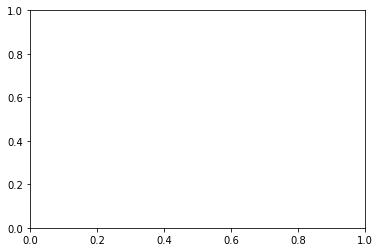

In [ ]:
import matplotlib.pylab as plt
plt.plot(range(0,10),RR.coef_)
plt.axhline(0, color = 'r', linestyle = 'solid')
plt.xticks(range(len(x_train.columns)),x_train.columns)
plt.ylabel("Ridge coeffcients")
plt.xlabel("Variable names")
plt.show()

**Train Linear Regression Model with train data Data Set**

In [26]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)
y_pred_lr = LR.predict(x_test)

In [27]:
y_pred_lr

array([[  19.67426384,   54.90813485,   49.64861346],
       [   3.51251007,  -56.84130279,  -78.74740202],
       [  95.43178751,  495.40079842,  445.92645817],
       ...,
       [  20.79375635,  109.2731824 ,   68.20028441],
       [  66.63089117,  592.99384984,  387.29981895],
       [ -31.78564645, -221.49070288, -236.44699615]])

In [28]:
from sklearn.metrics import mean_squared_error
lr_mse = mean_squared_error(y_test,y_pred_lr)
print(lr_mse)

12855.640091798094


In [ ]:
sub =pd.DataFrame(y_pred_knn_test)

**Export the Submission**

In [ ]:
sub.to_excel(r'/content/drive/MyDrive/Hackathon/submission/Final_sub.xlsx', index = False)

In [66]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(criterion = "mse", max_depth=None)


In [34]:
DT

DecisionTreeRegressor(criterion='mse')

In [67]:
DT.fit(x_train,y_train)
y_pred_dt = DT.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


In [68]:
y_pred_dt

array([[  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [148., 595., 480.],
       ...,
       [  0.,   0.,   0.],
       [ 53., 724., 247.],
       [  0.,   0.,   0.]])

In [69]:
from sklearn.metrics import mean_squared_error
DT_mse = mean_squared_error(y_test,y_pred_dt)
print(DT_mse)

924.4445994304266


In [38]:
dt_score = []
md = range(1,40)
for i in md:
    dt = DecisionTreeRegressor(criterion = "mse", max_depth=i)
    dt.fit(x_train,y_train)
    dt_pred = dt.predict(x_test)
    dt_score.append(mean_squared_error(y_test,dt_pred))
print(dt_score)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

[12470.22227077259, 4607.433910686421, 2638.4336690324376, 1785.2410403258418, 1301.4838478819304, 1033.0594550179437, 886.4586416808069, 776.4744217680944, 714.7717958193504, 683.9176086484573, 667.9764110083914, 673.4402141690637, 693.6482480230744, 716.3025335476312, 763.3891414168612, 794.444621666878, 817.617405956844, 835.318479540094, 850.4949201190863, 872.4218501986979, 887.463965220818, 901.4924862531824, 913.5473747598354, 897.8185942096353, 914.8358588315162, 922.8098562917481, 919.8069219316412, 920.4007041948711, 923.3733139844767, 920.2187697601361, 907.9111098149484, 912.0272971367262, 915.2188098944712, 916.4113344108549, 930.385404471899, 926.2406904625501, 922.3403741250904, 919.0896953695169, 914.6871248163001]


In [ ]:
print(dt_score)

[12470.22227077259, 4607.433910686421, 2638.4336690324376, 1785.2410403258418, 1301.4838478819304, 1033.0594550179437, 886.4586416808069, 776.4744217680944, 714.7515950571516, 684.1941340184682, 666.0698239287502, 671.5594864254876, 694.9050015051822, 719.1845281243941, 764.8548163836277, 790.3321715795206, 814.6437693763431, 835.8488795190182, 851.1575399982494, 868.4310137629609, 889.8253243165868, 912.2681059678774, 900.0551730151145, 909.76474898668, 926.6301561344412, 919.3606909888449, 911.0874714903892, 912.0211475193572, 916.6046860373709]


No handles with labels found to put in legend.


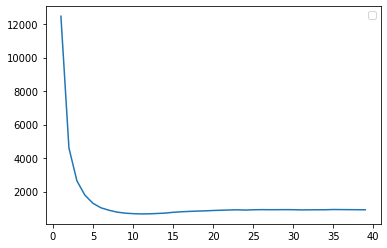

In [39]:
import matplotlib.pyplot as plt
plt.plot(md,dt_score)
plt.legend()
plt.show()

In [ ]:
DT.tree_.node_count

112183

In [ ]:
DT.tree_.max_depth

36

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor()
KNN.fit(x_train,y_train)
y_pred_knn = KNN.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse_knn = mean_squared_error(y_pred_knn, y_test)

In [ ]:
mse_knn

3650.0172223744303

In [96]:
# example of evaluating direct multioutput regression with an SVM model
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR
# define dataset
x_train, y = make_regression(n_samples=1000, n_features=17, n_informative=5, n_targets=3, random_state=1, noise=0.5)
# define base model
model_svm = LinearSVR()
# define the direct multioutput wrapper model
wrapper = MultiOutputRegressor(model_svm)
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(wrapper, x_train, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force the scores to be positive
# summarize performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -0.418 (0.015)


In [99]:
y_pred_sub= n_scores.predict(x_scale_test)

AttributeError: ignored

**Model fitting with Ensemble Methods**

**Ada Bosst**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ADBR = AdaBoostRegressor(base_estimator=DT, n_estimators=1000)


In [ ]:
y_train.ndim

2

In [ ]:
ADBR.fit(x_train,y_train)
y_pred_adab = ADBR.predict(x_test)

ValueError: ignored

In [ ]:
adab_acc = accuracy_score(y_test,y_pred_adab)
print(adab_acc)
adab_cm = confusion_matrix(y_test,y_pred_adab)
print(adab_cm)
adab_cr = classification_report(y_test,y_pred_adab)
print(adab_cr)

0.5206603096483133
[[2816   85 1689  279]
 [ 103  160  122   44]
 [1659   92 1831   88]
 [ 371   32  111  271]]
              precision    recall  f1-score   support

           a       0.57      0.58      0.57      4869
           s       0.43      0.37      0.40       429
           u       0.49      0.50      0.49      3670
           w       0.40      0.35      0.37       785

    accuracy                           0.52      9753
   macro avg       0.47      0.45      0.46      9753
weighted avg       0.52      0.52      0.52      9753



**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
GRB = GradientBoostingRegressor(loss="squared_error", learning_rate=0.1, n_estimators=100, subsample=1, criterion="friedman_mse", min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0, max_depth=3, min_impurity_decrease=0, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0)


In [ ]:
GradientBoostingRegressor()

GradientBoostingRegressor()

In [ ]:
GRB.fit(x_train,y_train)
y_pred_grb= GRB.predict(x_test)

ValueError: ignored

In [ ]:
grb_acc = accuracy_score(y_test,y_pred_grb)
print(grb_acc)
grb_cm = confusion_matrix(y_test,y_pred_grb)
print(grb_cm)
grb_cr = classification_report(y_test,y_pred_grb)
print(grb_cr)

0.5166615400389624
[[3623   19 1089  138]
 [ 156  110  148   15]
 [2393   44 1192   41]
 [ 560    9  102  114]]
              precision    recall  f1-score   support

           a       0.54      0.74      0.62      4869
           s       0.60      0.26      0.36       429
           u       0.47      0.32      0.38      3670
           w       0.37      0.15      0.21       785

    accuracy                           0.52      9753
   macro avg       0.50      0.37      0.39      9753
weighted avg       0.50      0.52      0.49      9753



In [ ]:
import numpy as np
np.arange(0.01,0.2,0.01)
range(1,100)

range(1, 100)

In [ ]:
np.arange(0.01,0.2,0.01)


array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19])

In [ ]:
y_test

19893    a
32235    a
13939    a
17470    a
22714    u
        ..
37601    a
39691    u
640      a
32256    u
38284    u
Name: season, Length: 9753, dtype: object

In [ ]:
y_pred_grb

array(['a', 'a', 'a', ..., 'a', 'a', 'a'], dtype=object)

**XG Boosting**

In [ ]:
from xgboost import XGBRegressor
XGB = XGBRegressor()
XGB.fit(x_train,y_train)
y_pred_xgb= XGB.predict(x_test)

ValueError: ignored

In [ ]:
acc_score_xgb = accuracy_score(y_test,y_pred_xgb).round(3)

In [ ]:
acc_score_xgb

0.518

**Model fitting With Bagging**

In [70]:
from sklearn.ensemble import BaggingRegressor
Bag= BaggingRegressor(base_estimator=DT, max_samples=0.9,
                  n_estimators=500)

In [71]:
Bag.fit(x_train,y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse'),
                 max_samples=0.9, n_estimators=500)

In [72]:
y_pred_bag= Bag.predict(x_test)

In [73]:
y_pred_bag

array([[  0.   ,   0.   ,   0.   ],
       [  0.   ,   0.   ,   0.   ],
       [130.582, 633.646, 480.07 ],
       ...,
       [  0.   ,   0.   ,   0.   ],
       [ 53.92 , 736.176, 245.756],
       [  0.   ,   0.   ,   0.   ]])

In [74]:
bag_mse = mean_squared_error(y_test,y_pred_bag)
print(bag_mse)

457.5366372591725


In [ ]:
import numpy as np
mse_bag=[]
settings = np.arange(0.1,1,0.1)

No need to code Random State incase of Bagging. Bagging Will take care of Sample by default.

In [ ]:
for i in settings:
    bag =BaggingRegressor(base_estimator=DT, max_samples=i, n_estimators=10)
    bag.fit(x_train,y_train)
    y_pred_bg = bag.predict(x_test)
    mse_bag.append(mean_squared_error(y_test,y_pred_bag))
print(mse_bag)

[458.5177558769517, 458.5177558769517, 458.5177558769517, 458.5177558769517, 458.5177558769517, 458.5177558769517, 458.5177558769517, 458.5177558769517, 458.5177558769517]


No handles with labels found to put in legend.


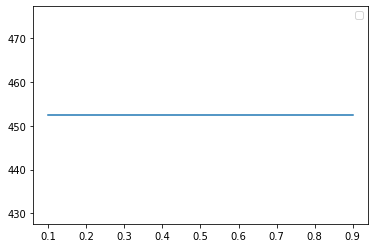

In [ ]:
import matplotlib.pyplot as plt
plt.plot(settings,mse_bag)
plt.legend()
plt.show()

**Random Forest**

In [75]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(max_features=0.6, n_estimators=1000)
RF.fit(x_train,y_train)
y_RF_pred = RF.predict(x_test)

In [76]:
rf_mse = mean_squared_error(y_test,y_RF_pred)

In [77]:
rf_mse

441.71297740353674

In [92]:
y_pred_sub = RF.predict(x_scale_test)
print(y_pred_sub)

[[0.    0.    0.   ]
 [0.    0.    0.   ]
 [0.    0.    0.   ]
 ...
 [0.565 6.649 0.703]
 [0.    0.    0.   ]
 [0.    0.    0.   ]]


In [93]:
sub= pd.DataFrame(y_pred_sub)
print(sub)

            0        1        2
0       0.000    0.000    0.000
1       0.000    0.000    0.000
2       0.000    0.000    0.000
3       0.000    0.000    0.000
4       0.000    0.000    0.000
...       ...      ...      ...
17515  48.624  609.269  167.044
17516  31.724  443.217   78.446
17517   0.565    6.649    0.703
17518   0.000    0.000    0.000
17519   0.000    0.000    0.000

[17520 rows x 3 columns]


In [94]:
sub.to_excel(r'/content/drive/MyDrive/Hackathon/Hackathon_Wipro/Final_sub.xlsx', index = False)

In [ ]:
RF_MSE = []
setting = np.arange(0.1,1,0.1)
for i in setting:
    RF = RandomForestRegressor(max_features=i, n_estimators=100)
    RF.fit(x_train,y_train)
    RF_pred = RF.predict(x_test)
    RF_MSE.append(mean_squared_error(y_test,y_RF_pred))
print(RF_MSE)

[441.16017116425456, 441.16017116425456, 441.16017116425456, 441.16017116425456, 441.16017116425456, 441.16017116425456, 441.16017116425456, 441.16017116425456, 441.16017116425456]


No handles with labels found to put in legend.


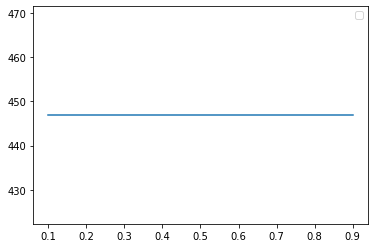

In [ ]:
import matplotlib.pyplot as plt
plt.plot(settings,RF_MSE)
plt.legend()
plt.show()

**ANN**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model= Sequential()
model.add(Dense(15,activation='relu',name='input'))
model.add(Dense(23,activation='relu',name='hidden'))
model.add(Dense(3,name='output'))

In [ ]:
model.compile(loss='mse', optimizer='adam')

In [ ]:
  model.fit(x =x_train, y= y_train, validation_data=(x_test,y_test), batch_size=2000, epochs=500, verbose=0)

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses

,loss,val_loss
0,140153.281250,141312.140625
1,138370.750000,137855.109375
2,131890.265625,127171.492188
3,116010.882812,104994.953125
4,89312.671875,74326.570312
...,...,...
495,553.564026,561.608948
496,553.623047,561.770264
497,553.376526,562.092285
498,553.254822,562.616211


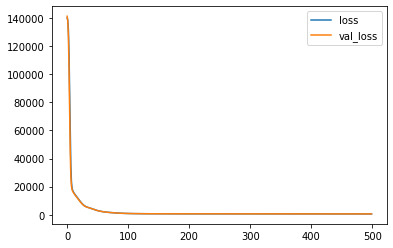

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
y_pred_ann = model.predict(x_test)

In [ ]:
mse_ann = mean_squared_error(y_test,y_pred_ann)

In [ ]:
mse_ann

561.4088142576236